In [1]:
import requests as req

In [2]:
# 1. req를 통해서 멜론차트 정보를 요청
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}
res = req.get("https://www.melon.com/chart/index.htm" , headers=head)

In [3]:
# 2. bs을 통해서 html 데이터로 변형
from bs4 import BeautifulSoup as bs
soup = bs(res.text , 'lxml')

In [4]:
# 3. 노래제목 수집
# soup.select("div.ellipsis rank01 > span > a")
# 선택자 내에서 띄어쓰기는 자손을 의미 -> 안나와
# 클래스값 중간에 공백이 있다 : 클래스가 복수개!!
# 클래스 하나하나 명시 (.으로)해줘야 함
# 클래스가 여러개일 때는 공백을 지우고 반드시 .으로 이어줌
song = soup.select("div.ellipsis.rank01 > span > a")
# copy selector 사용 : 
# data = soup.select("#lst50 > td > div > div > div > span > a")
# for i in data:
#     print(i.text)
song

[<a href="javascript:melon.play.playSong('1000002721',36713849);" title="Love Lee 재생">Love Lee</a>,
 <a href="javascript:melon.play.playSong('1000002721',36713850);" title="후라이의 꿈 재생">후라이의 꿈</a>,
 <a href="javascript:melon.play.playSong('1000002721',36617841);" title="Seven (feat. Latto) - Clean Ver. 재생">Seven (feat. Latto) - Clean Ver.</a>,
 <a href="javascript:melon.play.playSong('1000002721',36761467);" title="Smoke (Prod. Dynamicduo, Padi) 재생">Smoke (Prod. Dynamicduo, Padi)</a>,
 <a href="javascript:melon.play.playSong('1000002721',36599950);" title="Super Shy 재생">Super Shy</a>,
 <a href="javascript:melon.play.playSong('1000002721',36635522);" title="ETA 재생">ETA</a>,
 <a href="javascript:melon.play.playSong('1000002721',36681074);" title="Fast Forward 재생">Fast Forward</a>,
 <a href="javascript:melon.play.playSong('1000002721',36616378);" title="사막에서 꽃을 피우듯 재생">사막에서 꽃을 피우듯</a>,
 <a href="javascript:melon.play.playSong('1000002721',36382580);" title="헤어지자 말해요 재생">헤어지자 말해요</a>,
 <a hr

In [5]:
len(song)

100

In [6]:
# 4. 가수이름 수집
exSinger = soup.select("div.ellipsis.rank02 > span > a")
exSinger

[<a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>,
 <a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>,
 <a href="javascript:melon.link.goArtistDetail('725987');" title="정국 - 페이지 이동">정국</a>,
 <a href="javascript:melon.link.goArtistDetail('108358');" title="다이나믹 듀오 - 페이지 이동">다이나믹 듀오</a>,
 <a href="javascript:melon.link.goArtistDetail('2636153');" title="이영지 - 페이지 이동">이영지</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('968260');" title="전소미 - 페이지 이동">전소미</a>,
 <a href="javascript:melon.link.goArtistDetail('673033');" title="우디 (Woody) - 페이지 이동">우디 (Woody)</a>,
 <a href="javascript:melon.link.goArtistDetail('738480');" title="박재정 - 페이지 이동">박재정</a>,
 <a href="javascript:melon.link.goArtistDet

In [7]:
# 데이터의 개수가 정해진 경우에는 반드시 데이터 검증이 필요함!!
# 데이터의 길이, 데이터 개수
len(exSinger)

106

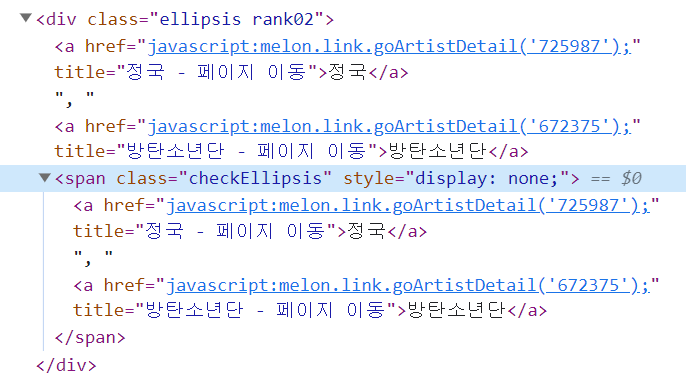
#### div를 통째로 들고 오면 a태그 하나, span태그 안에 있는 a태그 하나 : 글자가 두번 추출됨
      -> soup.select("div.ellipsis.rank02 > span.checkEllipsis")

In [8]:
singer = soup.select("div.ellipsis.rank02 > span.checkEllipsis")
singer
# ex) 김연지, 디셈버 : 각각 분리(a태그가 각각 : a태그가 2개)

[<span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('725987');" title="정국 - 페이지 이동">정국</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('108358');" title="다이나믹 듀오 - 페이지 이동">다이나믹 듀오</a>, <a href="javascript:melon.link.goArtistDetail('2636153');" title="이영지 - 페이지 이동">이영지</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</

In [15]:
len(singer)

100

In [9]:
# 5. 수집된 데이터를 텍스트 정보만 추출해서 저장
song_list = []
singer_list = []

for i in range(len(song)):
    song_list.append(song[i].text)
    singer_list.append(singer[i].text)

print(song_list)
print(singer_list)

['Love Lee', '후라이의 꿈', 'Seven (feat. Latto) - Clean Ver.', 'Smoke (Prod. Dynamicduo, Padi)', 'Super Shy', 'ETA', 'Fast Forward', '사막에서 꽃을 피우듯', '헤어지자 말해요', 'I Love My Body', 'I AM', '사랑은 늘 도망가', 'Bubble', '모래 알갱이', '퀸카 (Queencard)', '우리들의 블루스', 'Still With You', '다시 만날 수 있을까', '잘 지내자, 우리 (여름날 우리 X 로이킴)', 'Hype boy', 'Steal The Show (From “엘리멘탈”)', '이브, 프시케 그리고 푸른 수염의 아내', '이제 나만 믿어요', 'Either Way', '무지개', 'Spicy', '아버지', 'London Boy', 'Kitsch', 'Polaroid', 'Ditto', 'Love Me Again', '인생찬가', 'New Jeans', 'A bientot', 'KIDDING', '손이 참 곱던 그대', 'CAKE', '사랑해 진짜', '연애편지', 'Summer (Feat. BE’O (비오))', 'UNFORGIVEN (feat. Nile Rodgers)', 'After LIKE', '너의 모든 순간', '사건의 지평선', 'Dynamite', 'Vancouver 2', '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지', '나에게 그대만이', '보금자리', 'LOVE DIVE', 'OMG', '사랑인가 봐', 'Slow Dancing', '심(心)', 'Attention', "I Don't Think That I Like Her", 'Butter', '사랑하지 않아서 그랬어', '봄날', 'Get A Guitar', 'Rainy Days', '손오공', 'I WANT', 'Like Crazy', 'Dangerously', '꽃', 'Take Two', 'Dreamers [Music from the F

In [10]:
# 6. 표를 제작 : pandas 이용
import pandas as pd

In [11]:
dic = {'가수이름':singer_list , '노래제목':song_list}

In [12]:
melon = pd.DataFrame(dic)
melon

,가수이름,노래제목
0,AKMU (악뮤),Love Lee
1,AKMU (악뮤),후라이의 꿈
2,정국,Seven (feat. Latto) - Clean Ver.
3,"다이나믹 듀오, 이영지","Smoke (Prod. Dynamicduo, Padi)"
4,NewJeans,Super Shy
...,...,...
95,경서,첫 키스에 내 심장은 120BPM
96,aespa,Better Things
97,NewJeans,ASAP
98,"j-hope, J. Cole",on the street (with J. Cole)


In [13]:
# 7. 파일로 제작
# 인코딩 작업
# 한글이 깨지지 않게 반드시 해줘야함
# (1) utf-8
# (2) euc-kr
# (3) utf-8-sig
melon.to_csv('멜론차트.csv' , encoding='euc-kr') 

In [14]:
# 코드로 뽑아내고 싶을때
melon.to_html('멜론차트.html' , encoding='euc-kr')